In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fifa-21-complete-player-dataset/players_15.csv
/kaggle/input/fifa-21-complete-player-dataset/players_16.csv
/kaggle/input/fifa-21-complete-player-dataset/players_17.csv
/kaggle/input/fifa-21-complete-player-dataset/players_18.csv
/kaggle/input/fifa-21-complete-player-dataset/players_19.csv
/kaggle/input/fifa-21-complete-player-dataset/players_21.csv
/kaggle/input/fifa-21-complete-player-dataset/Career Mode player datasets - FIFA 15-21.xlsx
/kaggle/input/fifa-21-complete-player-dataset/players_20.csv


**Step 1: Select a real-world dataset**

In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("/kaggle/input/fifa-21-complete-player-dataset/players_15.csv")  # Load dataset(players_15.csv)

In [4]:
df.head()  # Display first 5 rows

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club_name,...,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,...,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,...,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,...,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,...,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,...,36+3,40+3,40+3,40+3,36+3,36+3,38+3,38+3,38+3,36+3


**Step 2: Perform data preparation & cleaning**

In [5]:
df.shape  # Shape of dataset (rows, cols)

(16155, 106)

In [6]:
df.info()  # Info about datatypes & missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16155 entries, 0 to 16154
Columns: 106 entries, sofifa_id to rb
dtypes: float64(18), int64(44), object(44)
memory usage: 13.1+ MB


In [7]:
df.isnull().sum()  # Missing values count

sofifa_id     0
player_url    0
short_name    0
long_name     0
age           0
             ..
lb            0
lcb           0
cb            0
rcb           0
rb            0
Length: 106, dtype: int64

In [8]:
df.describe()  # Summary statistics for numeric columns

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

,sofifa_id,age,height_cm,weight_kg,league_rank,overall,potential,value_eur,wage_eur,international_reputation,...,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
count,16155.000000,16155.000000,16155.000000,16155.000000,15916.000000,16155.000000,16155.000000,1.615500e+04,16155.000000,16155.000000,...,16155.000000,0.0,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000,16155.000000
mean,189284.184525,24.776230,181.083627,75.474342,1.378424,63.830393,68.350108,1.060882e+06,13056.453110,1.122501,...,49.648344,NaN,45.009037,47.656639,45.885918,15.869514,15.511668,15.354875,15.504735,15.998514
std,39749.261554,4.625321,6.618974,6.891796,0.736796,7.169896,6.580610,2.819128e+06,23488.182571,0.396263,...,14.552244,NaN,17.915206,18.743105,18.145497,17.576799,16.414173,16.010498,16.585081,17.983209
min,2.000000,16.000000,155.000000,50.000000,1.000000,40.000000,40.000000,0.000000e+00,0.000000,1.000000,...,20.000000,NaN,20.000000,20.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,178042.500000,21.000000,176.000000,70.000000,1.000000,59.000000,64.000000,1.200000e+05,2000.000000,1.000000,...,39.000000,NaN,25.000000,25.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,200841.000000,24.000000,181.000000,75.000000,1.000000,64.000000,68.000000,3.500000e+05,5000.000000,1.000000,...,50.000000,NaN,46.000000,52.000000,49.000000,11.000000,11.000000,11.000000,10.000000,10.000000
75%,214346.000000,28.000000,186.000000,80.000000,2.000000,68.000000,73.000000,8.250000e+05,10000.000000,1.000000,...,61.000000,NaN,61.000000,64.000000,62.000000,13.000000,14.000000,13.000000,13.000000,13.000000
max,225562.000000,44.000000,204.000000,110.000000,4.000000,93.000000,95.000000,1.005000e+08,550000.000000,5.000000,...,95.000000,NaN,90.000000,91.000000,95.000000,88.000000,87.000000,92.000000,90.000000,90.000000


In [9]:
print(df.isnull().sum().head(15))

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
dob              0
height_cm        0
weight_kg        0
nationality      0
club_name      239
league_name    239
league_rank    239
overall          0
potential        0
value_eur        0
dtype: int64


In [10]:
if "Value" in df.columns:
    df["Value_num"] = df["Value"].apply(convert_value)

if "Wage" in df.columns:
    df["Wage_num"] = df["Wage"].apply(convert_value)

**Step 3: Perform exploratory analysis & visualization Matplotlib - Resources**

In [11]:
import matplotlib.pyplot as plt

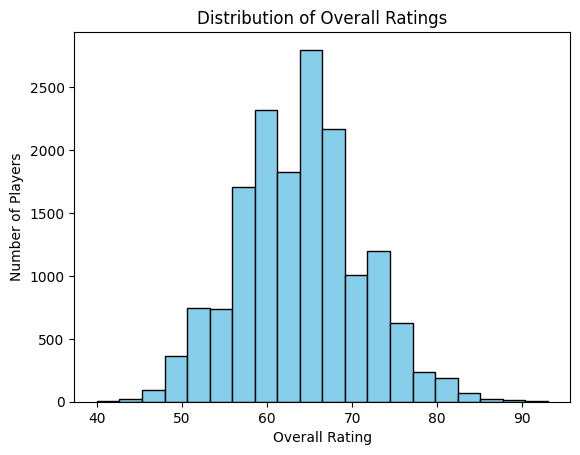

In [12]:
plt.hist(df["overall"], bins=20, color="skyblue", edgecolor="black")
plt.title("Distribution of Overall Ratings")
plt.xlabel("Overall Rating")
plt.ylabel("Number of Players")
plt.show()

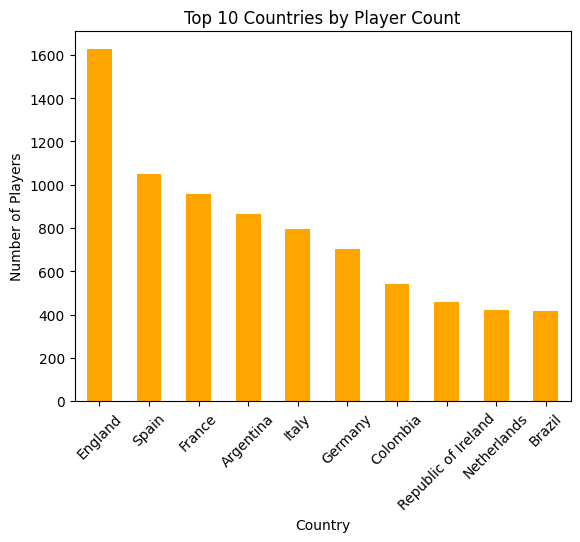

In [13]:
df["nationality"].value_counts().head(10).plot(kind="bar", color="orange")
plt.title("Top 10 Countries by Player Count")
plt.xlabel("Country")
plt.ylabel("Number of Players")
plt.xticks(rotation=45)
plt.show()

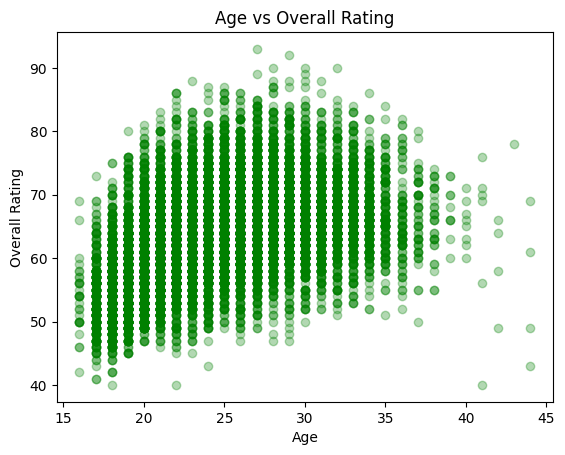

In [14]:
plt.scatter(df["age"], df["overall"], alpha=0.3, color="green")
plt.title("Age vs Overall Rating")
plt.xlabel("Age")
plt.ylabel("Overall Rating")
plt.show()

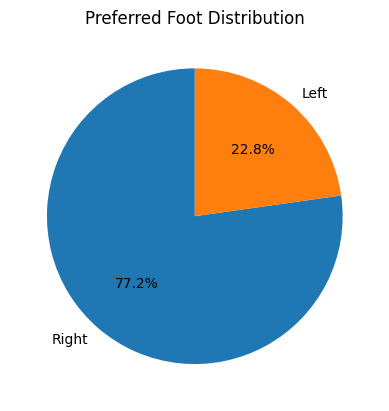

In [15]:
df["preferred_foot"].value_counts().plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Preferred Foot Distribution")
plt.ylabel("")
plt.show()

**Step 4: Ask & answer questions about the data**

**Q1 Which country produces the most FIFA players?**

In [16]:
top_country = df["nationality"].value_counts().idxmax()
print("Country with most players:", top_country)

Country with most players: England


**Q2 What’s the average overall rating of players?**

In [17]:
avg_rating = df["overall"].mean()
print(f"Average overall rating: {avg_rating:.2f}")

Average overall rating: 63.83


**Q3 Is there correlation between Age & Overall rating?**

In [18]:
correlation = df["age"].corr(df["overall"])
print(f"Correlation between Age and Overall rating: {correlation:.2f}")

Correlation between Age and Overall rating: 0.44


**Q4 Which player has the highest potential?**

In [19]:
best_potential = df.loc[df["potential"].idxmax(), ["long_name", "potential", "club_name"]]
print("Player with highest potential:\n", best_potential)

Player with highest potential:
 long_name    Lionel Andrés Messi Cuccittini
potential                                95
club_name                      FC Barcelona
Name: 0, dtype: object


**Step 5: Summarize your inferences & write a conclusion**


Majority of players are in their early to mid-20s.Midfielders and forwards are the most common positions.Only a small percentage of players have ratings above 85.Wages and player values are very uneven, with stars earning much more.European leagues have the largest share of players.Young players often have higher potential than older ones.Goalkeepers are rated on a different set of attributes than outfield players.